In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gamesphere-2000-app-store-insights-and-ratings/2000_games_appstore.csv


## Mount Data

In [2]:
game_set = pd.read_csv("/kaggle/input/gamesphere-2000-app-store-insights-and-ratings/2000_games_appstore.csv")
game_set.head(5)

,artistName,averageUserRating,averageUserRatingForCurrentVersion,contentAdvisoryRating,description,fileSizeBytes,isGameCenterEnabled,minimumOsVersion,price,primaryGenreId,releaseDate,trackName,userRatingCount,releaseNotes
0,Ynfo SAS di Graziano Gennaro & Co.,4.67589,4.67589,4+,Sticker GO! is the first app that helps you co...,36927488,False,12.0,0.0,6014,2024-02-08T08:00:00Z,Sticker GO!,253,Performance improvement
1,Hungry Studio,4.86087,4.86087,12+,Block Blast: A perfect mix of block and jigsaw...,154926080,True,12.0,0.0,6014,2022-04-03T07:00:00Z,Block Blast！,253100,- Bug fixes and performance improvements.\n- S...
2,"Scopely, Inc.",4.81924,4.81924,9+,"Hit GO! Roll the dice! Earn MONOPOLY money, in...",249300992,True,13.0,0.0,6014,2023-04-11T07:00:00Z,MONOPOLY GO!,2076657,"We've got a WILD update for you, Tycoons.\n\nG..."
3,ABIGAMES PTE. LTD,4.52683,4.52683,9+,"Introducing Wood Nuts & Bolts Puzzle, a captiv...",243209216,False,12.0,0.0,6014,2023-11-22T08:00:00Z,Wood Nuts & Bolts Puzzle,54892,- Update levels.
4,Lion Studios Plus,4.74130,4.74130,12+,Hexa Sort offers a delightful blend of puzzle ...,323801088,False,12.5,0.0,6014,2023-11-01T07:00:00Z,Hexa Sort,6150,Get ready! The most awaited features are here....


In [3]:
game_set.isnull().sum()

artistName                             0
averageUserRating                      0
averageUserRatingForCurrentVersion     0
contentAdvisoryRating                  0
description                            0
fileSizeBytes                          0
isGameCenterEnabled                    0
minimumOsVersion                       0
price                                 58
primaryGenreId                         0
releaseDate                            0
trackName                              0
userRatingCount                        0
releaseNotes                          31
dtype: int64

In [4]:
game_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   artistName                          2000 non-null   object 
 1   averageUserRating                   2000 non-null   float64
 2   averageUserRatingForCurrentVersion  2000 non-null   float64
 3   contentAdvisoryRating               2000 non-null   object 
 4   description                         2000 non-null   object 
 5   fileSizeBytes                       2000 non-null   int64  
 6   isGameCenterEnabled                 2000 non-null   bool   
 7   minimumOsVersion                    2000 non-null   object 
 8   price                               1942 non-null   float64
 9   primaryGenreId                      2000 non-null   int64  
 10  releaseDate                         2000 non-null   object 
 11  trackName                           2000 no

In [5]:
game_set.dtypes

artistName                             object
averageUserRating                     float64
averageUserRatingForCurrentVersion    float64
contentAdvisoryRating                  object
description                            object
fileSizeBytes                           int64
isGameCenterEnabled                      bool
minimumOsVersion                       object
price                                 float64
primaryGenreId                          int64
releaseDate                            object
trackName                              object
userRatingCount                         int64
releaseNotes                           object
dtype: object

## Trend Analysis: Utilize 'releaseDate' and 'averageUserRating' to identify trends in game popularity and user satisfaction over time.

In [6]:
gameset_cleaned = game_set.copy()
gameset_cleaned['releaseDate'] = pd.to_datetime(gameset_cleaned['releaseDate'])
gameset_cleaned.head()

,artistName,averageUserRating,averageUserRatingForCurrentVersion,contentAdvisoryRating,description,fileSizeBytes,isGameCenterEnabled,minimumOsVersion,price,primaryGenreId,releaseDate,trackName,userRatingCount,releaseNotes
0,Ynfo SAS di Graziano Gennaro & Co.,4.67589,4.67589,4+,Sticker GO! is the first app that helps you co...,36927488,False,12.0,0.0,6014,2024-02-08 08:00:00+00:00,Sticker GO!,253,Performance improvement
1,Hungry Studio,4.86087,4.86087,12+,Block Blast: A perfect mix of block and jigsaw...,154926080,True,12.0,0.0,6014,2022-04-03 07:00:00+00:00,Block Blast！,253100,- Bug fixes and performance improvements.\n- S...
2,"Scopely, Inc.",4.81924,4.81924,9+,"Hit GO! Roll the dice! Earn MONOPOLY money, in...",249300992,True,13.0,0.0,6014,2023-04-11 07:00:00+00:00,MONOPOLY GO!,2076657,"We've got a WILD update for you, Tycoons.\n\nG..."
3,ABIGAMES PTE. LTD,4.52683,4.52683,9+,"Introducing Wood Nuts & Bolts Puzzle, a captiv...",243209216,False,12.0,0.0,6014,2023-11-22 08:00:00+00:00,Wood Nuts & Bolts Puzzle,54892,- Update levels.
4,Lion Studios Plus,4.74130,4.74130,12+,Hexa Sort offers a delightful blend of puzzle ...,323801088,False,12.5,0.0,6014,2023-11-01 07:00:00+00:00,Hexa Sort,6150,Get ready! The most awaited features are here....


In [7]:
avrRating_cleaned = gameset_cleaned[gameset_cleaned['averageUserRating'] != 0]
avrRating_cleaned['averageUserRating'].value_counts()

averageUserRating
4.45240    4
4.46985    4
4.60690    3
4.69271    3
4.77588    3
          ..
4.78972    1
4.12120    1
4.66944    1
4.67717    1
4.68007    1
Name: count, Length: 1621, dtype: int64

In [8]:
avrRating_cleaned.head(5)

,artistName,averageUserRating,averageUserRatingForCurrentVersion,contentAdvisoryRating,description,fileSizeBytes,isGameCenterEnabled,minimumOsVersion,price,primaryGenreId,releaseDate,trackName,userRatingCount,releaseNotes
0,Ynfo SAS di Graziano Gennaro & Co.,4.67589,4.67589,4+,Sticker GO! is the first app that helps you co...,36927488,False,12.0,0.0,6014,2024-02-08 08:00:00+00:00,Sticker GO!,253,Performance improvement
1,Hungry Studio,4.86087,4.86087,12+,Block Blast: A perfect mix of block and jigsaw...,154926080,True,12.0,0.0,6014,2022-04-03 07:00:00+00:00,Block Blast！,253100,- Bug fixes and performance improvements.\n- S...
2,"Scopely, Inc.",4.81924,4.81924,9+,"Hit GO! Roll the dice! Earn MONOPOLY money, in...",249300992,True,13.0,0.0,6014,2023-04-11 07:00:00+00:00,MONOPOLY GO!,2076657,"We've got a WILD update for you, Tycoons.\n\nG..."
3,ABIGAMES PTE. LTD,4.52683,4.52683,9+,"Introducing Wood Nuts & Bolts Puzzle, a captiv...",243209216,False,12.0,0.0,6014,2023-11-22 08:00:00+00:00,Wood Nuts & Bolts Puzzle,54892,- Update levels.
4,Lion Studios Plus,4.74130,4.74130,12+,Hexa Sort offers a delightful blend of puzzle ...,323801088,False,12.5,0.0,6014,2023-11-01 07:00:00+00:00,Hexa Sort,6150,Get ready! The most awaited features are here....


In [9]:
year_trend = avrRating_cleaned.groupby(['releaseDate'], as_index=False)['averageUserRating'].min()
year_trend = year_trend.sort_values('averageUserRating', ascending=True).head(10)
year_trend

,releaseDate,averageUserRating
900,2022-05-16 07:00:00+00:00,1.00000
1026,2023-01-08 08:00:00+00:00,1.45447
902,2022-05-18 07:00:00+00:00,1.66667
998,2022-11-16 08:00:00+00:00,1.81065
1245,2024-01-18 08:00:00+00:00,1.88889
1252,2024-01-31 08:00:00+00:00,2.33333
1261,2024-02-15 08:00:00+00:00,2.61111
1128,2023-06-29 07:00:00+00:00,2.66667
888,2022-04-21 07:00:00+00:00,2.66667
1218,2023-11-27 08:00:00+00:00,2.68790


In [10]:
year_trend = avrRating_cleaned.groupby(['averageUserRating'], as_index=False)['releaseDate'].max()
year_trend = year_trend.sort_values('releaseDate').sample(100)
year_trend

,averageUserRating,releaseDate
432,4.49824,2021-01-14 08:00:00+00:00
25,3.34884,2023-05-04 07:00:00+00:00
592,4.56067,2017-01-13 10:31:35+00:00
64,3.86977,2023-07-19 07:00:00+00:00
661,4.58247,2018-08-02 05:23:28+00:00
...,...,...
861,4.64109,2023-05-01 07:00:00+00:00
1086,4.69684,2018-10-03 03:58:25+00:00
969,4.66819,2022-04-15 07:00:00+00:00
1368,4.77737,2022-07-07 07:00:00+00:00


In [11]:
#plt.rcParams['figure.figsize'] = (20,5)

#plt.plot("releaseDate", "averageUserRating", data=year_trend, color ='maroon')
#plt.xlabel("Year")
#plt.ylabel("Rating")
#plt.title("Average User Rating Trend Over The Year")

#sns.relplot(x='releaseDate', y='averageUserRating', data=year_trend, kind='line', height=6, aspect=4)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Average Games Rating Per Year'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Rate')]

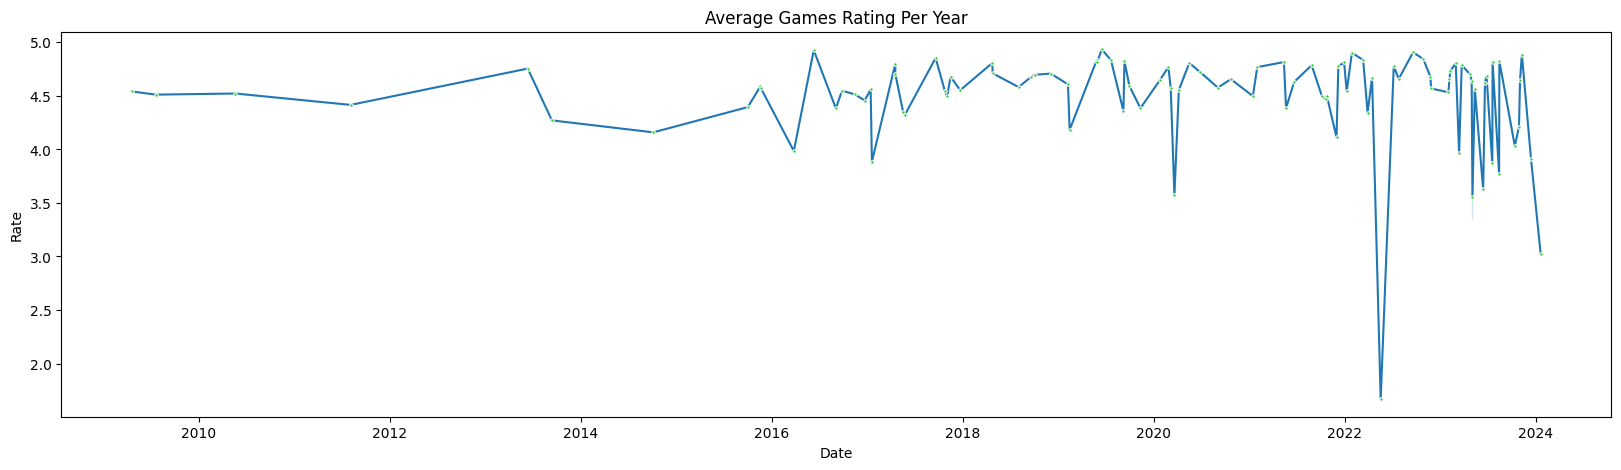

In [12]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='releaseDate', y='averageUserRating', data=year_trend, marker='.', markerfacecolor='limegreen', markersize=5).set(title='Average Games Rating Per Year', xlabel='Date', ylabel='Rate')